# Reader script for EEG files
estallando desde el oceano - Sumo


## Things that I installed

In [20]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 102.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 100.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 104.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --user gdown


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gdown]
Note: you may need to restart the kernel to use updated packages.


## Functions
### Save EEG as table CSV

In [14]:
import os
import numpy as np
from datetime import datetime
from scipy.io import loadmat

def save_eeg_table_with_T0(mat_path, EEG_Table, output_dir="."):
    """
    Save an EEG table to CSV using the .mat filename and the T0 timestamp.

    Parameters
    ----------
    mat_path : str
        Full path to the .mat file.
    EEG_Table : pandas.DataFrame
        DataFrame containing Time + EEG channels.
    output_dir : str, optional
        Directory where the CSV will be saved (default: current directory).

    Returns
    -------
    csv_path : str
        Full path to the saved CSV file.
    """

    # Load .mat to access header
    mat_data = loadmat(mat_path)
    hdr = mat_data["hdr"]

    # Extract T0
    orig = hdr["orig"][0,0]
    T0 = np.array(orig["T0"][0,0]).astype(int).flatten()

    start_time = datetime(
        year=T0[0],
        month=T0[1],
        day=T0[2],
        hour=T0[3],
        minute=T0[4],
        second=T0[5]
    )

    # Format timestamp
    date_str = start_time.strftime("%Y%m%d_%H%M%S")

    # Base filename (without .mat)
    base_name = os.path.splitext(os.path.basename(mat_path))[0]

    # Final CSV name
    csv_name = f"{base_name}_{date_str}.csv"
    csv_path = os.path.join(output_dir, csv_name)

    # Save
    EEG_Table.to_csv(csv_path, index=False)

    return csv_path
# how to use it:
#csv_path = save_eeg_table_with_T0(
#    mat_path="/home/tperezsanchez/data/XB47Y_1.mat",
#    EEG_Table=EEG_Table,
#    output_dir="/home/tperezsanchez/data/csv"
#)

### Save EEG plot as png

In [15]:
import os
import numpy as np
from datetime import datetime
from scipy.io import loadmat

def save_eeg_plot_with_T0(mat_path, fig, output_dir=".", dpi=300):
    """
    Save an EEG plot to PNG using the .mat filename and the T0 timestamp.

    Parameters
    ----------
    mat_path : str
        Full path to the .mat file.
    fig : matplotlib.figure.Figure
        Figure object to save.
    output_dir : str, optional
        Directory where the PNG will be saved (default: current directory).
    dpi : int, optional
        Resolution of the saved image (default: 300).

    Returns
    -------
    png_path : str
        Full path to the saved PNG file.
    """

    # Load .mat to access header
    mat_data = loadmat(mat_path)
    hdr = mat_data["hdr"]

    # Extract T0
    orig = hdr["orig"][0,0]
    T0 = np.array(orig["T0"][0,0]).astype(int).flatten()

    start_time = datetime(
        year=T0[0],
        month=T0[1],
        day=T0[2],
        hour=T0[3],
        minute=T0[4],
        second=T0[5]
    )

    # Format timestamp
    date_str = start_time.strftime("%Y%m%d_%H%M%S")

    # Base filename (without .mat)
    base_name = os.path.splitext(os.path.basename(mat_path))[0]

    # Final PNG name
    png_name = f"{base_name}_{date_str}.png"
    png_path = os.path.join(output_dir, png_name)

    # Save figure
    fig.savefig(png_path, dpi=dpi, bbox_inches="tight")

    return png_path


## Exploring the data

In [18]:
import os

file_path = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/XB47Y_1.mat"
abs_path = os.path.abspath(file_path)
#"/home/tperezsanchez/EEG_data_vis/data/Working/XB47Y/XB47Y_1.mat"
print(abs_path)


/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/XB47Y_1.mat


In [19]:
from scipy.io import loadmat

data_XB47Y_1 = loadmat(abs_path)

print(data_XB47Y_1 .keys())
# two important things, HDR and DATa

dict_keys(['__header__', '__version__', '__globals__', 'hdr', 'data'])


In [20]:
data_var = data_XB47Y_1['data']
# what is data? prob is the matrix
print(type(data_var), data_var.shape)
# DATA is an array containing the seconds of eac

<class 'numpy.ndarray'> (2, 28566)


In [21]:
hdr = data_XB47Y_1['hdr']
print(type(hdr))
print(hdr.dtype)

hdr.dtype.names
# is a struct MATLAB
# Es 

<class 'numpy.ndarray'>
[('Fs', 'O'), ('nChans', 'O'), ('label', 'O'), ('nSamples', 'O'), ('nSamplesPre', 'O'), ('nTrials', 'O'), ('orig', 'O'), ('chantype', 'O'), ('chanunit', 'O')]


('Fs',
 'nChans',
 'label',
 'nSamples',
 'nSamplesPre',
 'nTrials',
 'orig',
 'chantype',
 'chanunit')

In [22]:
fs = hdr['Fs'][0,0]
channels = hdr['label'][0,0]
# now I only select the channels within the hdr
channels2 = hdr['label'] # arrays of arrays, we only want to select one 
print(fs)
#print(channels) # are these the label of each channel?
print(channels2) 
orig = hdr['orig'][0,0]
print(orig.dtype.names)

[[207.03105466]]
[[array([[array(['EEG SQ_D-SQ_C'], dtype='<U13')],
         [array(['EEG SQ_P-SQ_C'], dtype='<U13')]], dtype=object)]]
('VERSION', 'T0', 'HeadLen', 'NRec', 'Dur', 'NS', 'Label', 'Transducer', 'PhysDim', 'PhysMin', 'PhysMax', 'DigMin', 'DigMax', 'PreFilt', 'SPR', 'Cal', 'Off', 'Calib', 'SampleRate', 'Chan_Select', 'ChanTyp', 'AS', 'chansel', 'annotation')


In [23]:
T0 = orig['T0'][0,0]
print(T0)
# recording file starts: 2019-11-26 07h32m3s, ESTA EN FORMATO GRINGO 

[[2019   11   26    7   32    3]]


## Table and plot for EEG

In [24]:
import numpy as np
import pandas as pd

fs = float(hdr['Fs'][0,0]) # transform to float32, this is the sampling freq/rate
channels_raw = hdr['label'][0,0] # chanells, in this case they are two
channels_raw.shape # 2 rows and 1 columns 
channels_raw.shape[0] # I select only the channels
channels = []
for row in channels_raw:
    channels.append(str(row[0][0]))
    # row[0][0] --> EEG SQ_D-SQ_C
signal = np.asarray(data_XB47Y_1['data'])
if signal.shape[1] != len(channels) and signal.shape[0] == len(channels):
    signal = signal.T
# Converst signal from .mat into a numpy array


#number of samples
n_samples = signal.shape[0] 
print("number of samples (rows):",n_samples)

# Δt = 1 / freq ≈ 0.00483 s
time = np.arange(n_samples) / fs 

# create data frame:
EEG_Table = pd.DataFrame(signal, columns=channels)
EEG_Table.insert(0, "Time", time)

EEG_Table
# I need to save this on a csv

number of samples (rows): 28566


/tmp/ipykernel_1322789/2651441660.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fs = float(hdr['Fs'][0,0]) # transform to float32, this is the sampling freq/rate


,Time,EEG SQ_D-SQ_C,EEG SQ_P-SQ_C
0,0.000000,95.953070,72.468053
1,0.004830,-56.364041,-88.572064
2,0.009660,-435.479317,-462.990337
3,0.014491,-303.963221,-327.448238
4,0.019321,-106.689078,-120.780088
...,...,...,...
28561,137.955149,-1374.209000,-1374.209000
28562,137.959979,-1374.209000,-1374.209000
28563,137.964809,-1374.209000,-1374.209000
28564,137.969640,-1374.209000,-1374.209000


In [10]:
# save table into a csv
csv_path = save_eeg_table_with_T0(
    mat_path="/home/tperezsanchez/EEG_data_vis/data/Working/XB47Y/XB47Y_1.mat",
    EEG_Table=EEG_Table,
    output_dir="/home/tperezsanchez/EEG_data_vis/results/test_04022026/"
)

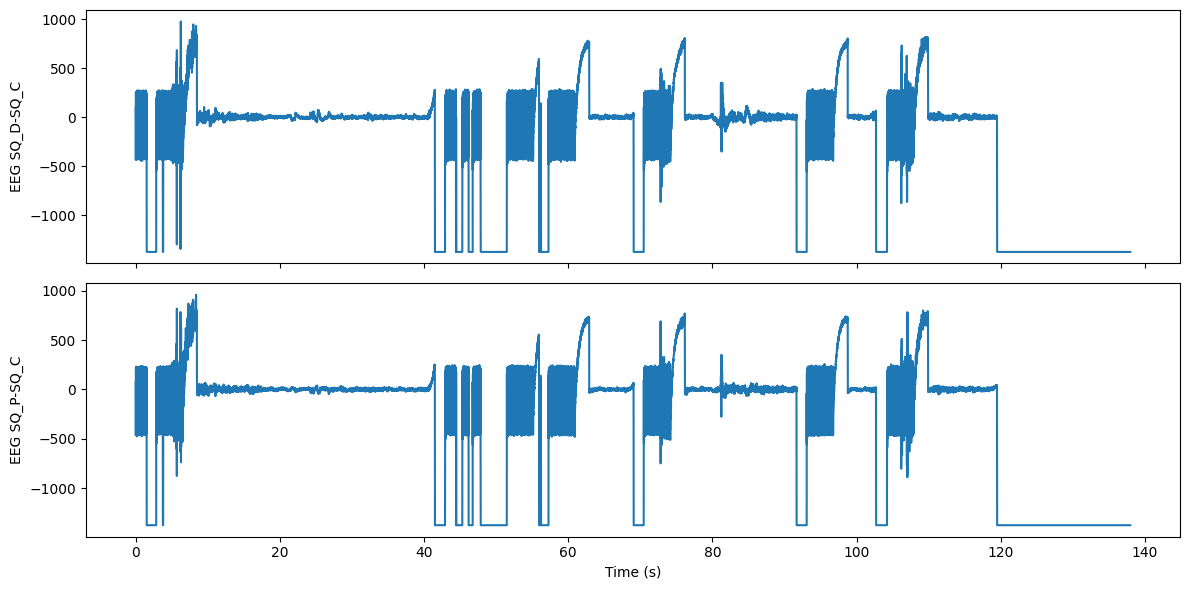

In [25]:
# signal plots
EEG_TimeTable = EEG_Table.set_index("Time")
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    nrows=EEG_TimeTable.shape[1],
    ncols=1,
    sharex=True,
    figsize=(12, 6)
)

for ax, channel in zip(axes, EEG_TimeTable.columns):
    ax.plot(EEG_TimeTable.index, EEG_TimeTable[channel])
    ax.set_ylabel(channel)

axes[-1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()



In [15]:
png_path = save_eeg_plot_with_T0(
    mat_path="/home/tperezsanchez/EEG_data_vis/data/Working/XB47Y/XB47Y_1.mat",
    fig=fig,
    output_dir="/home/tperezsanchez/EEG_data_vis/results/test_04022026/"
)


## Pre- Process test
keep in mind that fs is the sampling freq. how many times I measure the signal by second.
each sample is separeted by ~3.7ms

### Artifacts removal
cut-off +-200uV

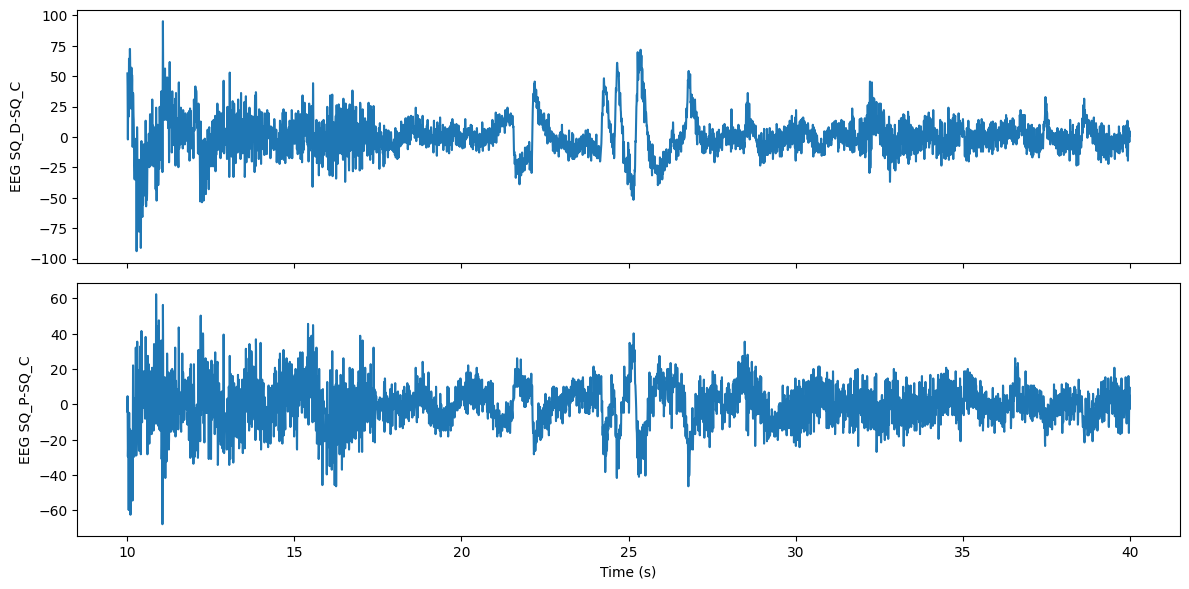

In [23]:
#zoom into the window after 10s and before 40s
# Away from the artifacts 
# BEFORE
# signal plots
EEG_TimeTable = EEG_Table.set_index("Time")

# SELECT WINDOWS 10s–40s
EEG_win = EEG_TimeTable.loc[10:40]

import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    nrows=EEG_win.shape[1],
    ncols=1,
    sharex=True,
    figsize=(12, 6)
)

for ax, channel in zip(axes, EEG_win.columns):
    ax.plot(EEG_win.index, EEG_win[channel])
    ax.set_ylabel(channel)

axes[-1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()


### BAND PASS and notch filtering:

A **band-pass filter** keeps only the components of an EEG signal that fall within a specific frequency range, while attenuating slower and faster fluctuations outside that band. In the context of EEG analysis, applying a 0.5–40 Hz band-pass filter removes very low-frequency drifts caused by electrode movement, sweating, or baseline instability, as well as high-frequency noise mainly originating from muscle activity and external electrical sources. This preprocessing step preserves the physiologically meaningful rhythms and transient events—such as spikes and sharp waves—that are most relevant for clinical interpretation and for downstream tasks like seizure detection or machine-learning-based feature extraction, while improving signal-to-noise ratio and model stability.


```
slow signal:
x₀   x₁   x₂   x₃
│    │    │    │
10  10.1 10.2 10.3   µV

fast signal:
x₀    x₁    x₂    x₃
│     │     │     │
10   -10   10   -10   µV
```

this is the example of a signal that changes at 10hz:
10 ─ 0 ─ 10 ─ 0 ─ 10


this is the example of a signal that changes at 80hz, which is out of the established higher cut (40hz): 
10 -10 10 -10 10 -10


Butterworth measures how the signal correlates with itself along time
y[n] = a₁·y[n−1] + a₂·y[n−2]
     + b₀·x[n]   + b₁·x[n−1] + b₂·x[n−2]

**b, a = butter(order, [low, high], btype="band")**
“Construí un sistema matemático que, cuando vea una señal en el tiempo,
deje pasar patrones que cambian entre 0.5 y 40 veces por segundo
(dado mi fs), y atenúe los demás.”


In [12]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt

def bandpass_filter_eegwin(EEG_win: pd.DataFrame, lowcut=0.5, highcut=40.0, order=4):
    """
    Band-pass 0.5–40 Hz (default) for a windowed EEG DataFrame.
    
    EEG_win:
      - index: time in seconds (must be numeric and monotonic)
      - columns: channels
      - values: signal amplitude
    """
    # --- 1) infer sampling frequency from the time index (seconds) ---
    t = EEG_win.index.to_numpy(dtype=float)
    dt = np.median(np.diff(t))
    if dt <= 0:
        raise ValueError("Time index must be strictly increasing.")
    fs = 1.0 / dt

    # sanity: need enough samples
    if EEG_win.shape[0] < (order * 6):
        raise ValueError("Window too short for stable filtering. Use a longer window or lower order.")

    # --- 2) design filter ---
    nyq = 0.5 * fs # same as dividing by 2
    # Nyquist: limits of this system
    low = lowcut / nyq
    high = highcut / nyq
    # normalize for scypy and the only thing that I care are the freq between that range

    if not (0 < low < high < 1):
        raise ValueError(f"Cutoffs invalid for fs={fs:.3f} Hz. Got normalized low={low:.4f}, high={high:.4f}")
    #calculates the coeficients of each filter
    b, a = butter(order, [low, high], btype="band")

    # --- 3) apply zero-phase filtering per channel ---
    X = EEG_win.to_numpy(dtype=float)          # shape: (n_samples, n_channels)
    Xf = filtfilt(b, a, X, axis=0)             # filter along time axis

    EEG_win_filt = pd.DataFrame(Xf, index=EEG_win.index, columns=EEG_win.columns)

    return EEG_win_filt, fs


In [13]:
EEG_win_filt, fs = bandpass_filter_eegwin(EEG_win, lowcut=0.5, highcut=40, order=4)
print("Inferred fs:", fs)


Inferred fs: 207.03105465824683


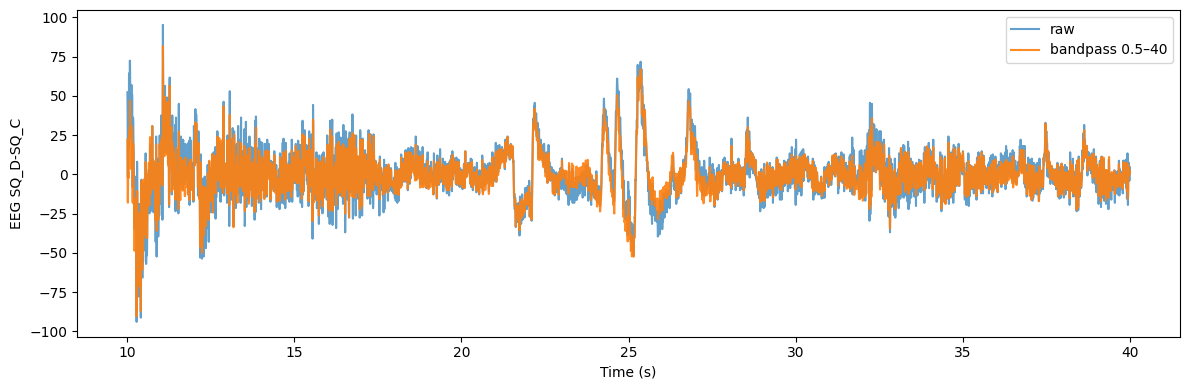

In [15]:
import matplotlib.pyplot as plt

ch = EEG_win.columns[0]  # elegí un canal
plt.figure(figsize=(12,4))
plt.plot(EEG_win.index, EEG_win[ch], label="raw", alpha=0.7)
plt.plot(EEG_win_filt.index, EEG_win_filt[ch], label="bandpass 0.5–40", alpha=0.9)
plt.xlabel("Time (s)")
plt.ylabel(ch)
plt.legend()
plt.tight_layout()
plt.show()


### Z score prototype table
z = (signal - mean(signal)) / std(signal)



In [18]:
EEG_win

,Ch1_uV,Ch2_uV
Time,,
10.003330,52.338038,-4.026003
10.008160,42.273031,4.697003
10.012991,12.078009,-14.091010
10.017821,-2.013001,-29.524021
10.022651,17.446013,-24.827018
...,...,...
39.979509,-2.013001,5.368004
39.984340,-4.026003,2.013001
39.989170,0.671000,-2.684002


In [20]:
# channel 1: EEG SQ_D-SQ_C
# channel 2: EEG SQ_P-SQ_C
EEG_TimeTable = EEG_TimeTable.rename(columns={
    "EEG SQ_D-SQ_C": "Ch1_uV",
    "EEG SQ_P-SQ_C": "Ch2_uV"
})

EEG_win = EEG_TimeTable.loc[10:40]
df_zscore_1040win = EEG_win.copy()
df_zscore_1040win = df_zscore_1040win.reset_index() # so time is a column and not an index

df_zscore_1040win["Ch1_zscore_uV"] = (
    df_zscore_1040win["Ch1_uV"] - df_zscore_1040win["Ch1_uV"].mean()
) / df_zscore_1040win["Ch1_uV"].std()

df_zscore_1040win["Ch2_zscore_uV"] = (
    df_zscore_1040win["Ch2_uV"] - df_zscore_1040win["Ch2_uV"].mean()
) / df_zscore_1040win["Ch2_uV"].std()

df_zscore_1040win = df_zscore_1040win[["Time", "Ch1_zscore_uV", "Ch2_zscore_uV"]]


In [21]:
df_zscore_1040win

,Time,Ch1_zscore_uV,Ch2_zscore_uV
0,10.003330,3.406963,-0.328192
1,10.008160,2.747642,0.402176
2,10.012991,0.769679,-1.170925
3,10.017821,-0.153371,-2.463116
4,10.022651,1.121316,-2.069841
...,...,...,...
6206,39.979509,-0.153371,0.458359
6207,39.984340,-0.285235,0.177447
6208,39.989170,0.022448,-0.215828
6209,39.994000,0.286176,0.233630
